# Hybrid Plant with Wind, Solar, Battery, Hydrogen Example
---
In this example we will simulate a hybrid plant using the GreenHEART software. This software allows for the co-design and simulation of an integrated renewable energy and hydrogen production plant. 

This simulation starts with renewable energy generation using wind and solar PV technologies, which then can be stored in a battery or directly supplied to a PEM electrolyzer for hydrogen production. 

### Import Required Modules
---
Begin by importing the necessary modules for the GreenHEART simulation.

In [1]:
from greenheart.simulation.greenheart_simulation import GreenHeartSimulationConfig
from greenheart.tools.optimization.gc_run_greenheart import run_greenheart
from greenheart.tools.plot import plot_hydrogen_flows, plot_energy_flows
import datetime as dt

/home/cbay/GreenHEART/examples/log/hybrid_systems_2025-03-22T13.03.56.481861.log


### Load Simulation Input Files
---
Input files are in a YAML file format. Four YAML files are required for land-based analysis:
1. HOPP Configuration YAML
2. GreenHEART Configuration YAML
3. Wind Turbine Configuration YAML
4. FLORIS Configuration YAML

#### HOPP YAML Overview

The HOPP YAML file includes information required for simulating the renewable energy generation at the plant. Such as:

- **Analysis Location**: Specifies latitude, longitude, site boundaries, and resource files.
- **Generation Technologies**: Encompasses details on wind, solar PV, and battery storage systems.
- **General Generation Configuration Options**: Encompasses simulation options, battery dispatch strategies, and cost information.

In [2]:
filename_hopp_config = "./inputs/plant/hopp_config.yaml"

#### GreenHEART YAML Overview

The GreenHEART YAML file includes information required for simulating the renewable energy generation through the end product production (hydrogen, steel, ammonia). Such as:

- **Plant Design Scenarios**: Specifies location and connection of individual components of plant.
- **Financial Parameters**: General financial parameters needed for calculating the levelized cost of product and other financial metrics.
- **Hydrogen Equipment Information**: Including electrolyzer specifications, compressor, pipeline, and H<sub>2</sub> storage information.
- **Policy Options**: Describes options to include [IRA](https://www.whitehouse.gov/wp-content/uploads/2022/12/Inflation-Reduction-Act-Guidebook.pdf) tax incentives policy in GreenHEART simulation.

In [3]:
filename_greenheart_config = "./inputs/plant/greenheart_config_onshore-hydrogen.yaml"

#### Wind Turbine and FLORIS YAML Overview

The GreenHEART simulation runs a steady-state wake modeling tool ([FLORIS](https://www.nrel.gov/wind/floris.html)) to assess the wind farm's energy production. For accurate modeling within FLORIS, two configuration YAML files are required:

- The **Wind Turbine YAML** file includes the description of the turbine including turbine rating rotor diameter, hub hight, and the power curve.
- The **FLORIS YAML** file includes atmospheric conditions and wake models used in simulation.

In [4]:
turbine_model = "lbw_6MW"
filename_turbine_config = "./inputs/turbines/" + turbine_model + ".yaml"
filename_floris_config = "./inputs/floris/floris_input_" + turbine_model + ".yaml"

### Create Full Configuration to Run GreenHEART Simulation
---
The class `GreenHeartSimulationConfig` reads in all the required YAML files described above, allows user to set additional settings while running the GreenHEART simulation, these include:
- **verbose**: If set to `True` additional information about the simulation will be printed as it runs.
- **show_plots**: If set to `True` the plots will pop up during the simulation.
- **save_plots**: If set to `True` the plots will be saved in the .output/figures folder.
- **use_profast**: [ProFAST](https://github.com/NREL/ProFAST) is a financial analysis software that provides a quick and convenient in-depth financial analysis for production systems and services based on Generally Accepted Accounting Principles (GAAP) methodology.
- **incentive_options**: Can select IRA incentives options which are located in the `GreenHEART YAML`.
- **plant_design_scenario**: Can select the plant design scenario from options which are located in the `GreenHEART YAML`.
- **output_level**: Determines what information is returned from the simulation.
- **post_processing**: If set to `True` the post_process_simulation() function in [utilities.py](https://github.com/NREL/GreenHEART/blob/main/greenheart/tools/eco/utilities.py) will be run. This function performs multiple post-processes dependent on the other arguments specified for the `GreenHeartSimulationConfig` class listed above and configuration set in the required YAML files.
    - If **verbose** is set to `True` additional information about the simulation will be printed.
    - If **show_plots** or **save_plots** are `True` additional plots of the plant will be shown or saved to ./output/figures folder.
    - If the `lca_config`:`run_lca` flag in the `GreenHEART YAML` is set to `True` Life Cycle Assessment (LCA) analysis will be run with the calculate_lca() function in [utilities.py](https://github.com/NREL/GreenHEART/blob/main/greenheart/tools/eco/utilities.py) and the data will be saved to .output/data/lca folder.

In [5]:
config = GreenHeartSimulationConfig(
    filename_hopp_config,
    filename_greenheart_config,
    filename_turbine_config,
    filename_floris_config,
    verbose=True,
    show_plots=False,
    save_plots=False,
    use_profast=True,
    post_processing=True,
    incentive_option=1,
    plant_design_scenario=9,
    output_level=7,
)


Turbine configuration:
turbine_type :  lbw_6MW
turbine_rating :  6.0
hub_height :  115.0
rotor_diameter :  196.0
TSR :  9.0
operation_model :  cosine-loss
power_thrust_table :  {'ref_air_density': 1.225, 'ref_tilt': 6.0, 'cosine_loss_exponent_yaw': 1.88, 'cosine_loss_exponent_tilt': 1.88, 'wind_speed': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 50.0], 'power': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 96.24651230523119, 259.8655834676017, 466.7955856533571, 719.4426800803637, 1020.2130323647901, 1383.5436169472148, 1804.622107344728, 2297.8854847039333, 2868.1460733155195, 3491.3422371404968, 4143.412363766887, 4766.60853153047, 5283.933537682093, 5644.857957214306, 5866.224936675051, 6000.970054119055, 6015.407027531671, 6015.407039825664, 6015.4070

### Run the GreenHEART Simulation
---
The simulation runs a techno-economic analysis of a given plant configuration. Data and figures are output to a separate folder.

In [6]:
# Suppress showing plots in output below if show_plots == False
if not config.show_plots:
    %matplotlib agg

# for analysis
prob, config = run_greenheart(config, run_only=True)

# for optimization
# prob, config = run_greenheart(config, run_only=False)

/home/cbay/anaconda3/envs/h2i/lib/python3.11/site-packages/openmdao/core/driver.py:769: OpenMDAOWarning:Driver: No matches for pattern '*_df' in recording_options['excludes'].


FLORIS is the system model...
Simulating wind farm output in FLORIS...

HOPP Results
Hybrid Annual Energy: {"pv": 160336236.38669494, "wind": 3919162140.8383026, "battery": -15959.417939834013, "hybrid": 4079482417.8070574}
Capacity factors: {"pv": 23.79419033135884, "wind": 34.52106006573002, "battery": 0, "hybrid": 31.61701702068134}
Real LCOE from HOPP: {"pv": 6.240306471360993, "wind": 3.977516819993022, "battery": 168.95901467973678, "hybrid": 4.16211725313441}
Took 0.04 sec to run the create clusters
Took 0.04 sec to run even_split_power function
Took 0.707 sec to run the RUN function

Electrolyzer Physics:
H2 Produced Annually (metric tons):  76906.54377721724
Max H2 hourly (metric tons):  22.731134244210363
Max H2 daily (metric tons):  537.2457021120546
Energy to electrolyzer (kWh):  4079369842.1256514
Energy per kg (kWh/kg):  50.39626689176883
Max hourly based on est kg/kWh (kg):  23722.833504198
Max daily rough est (metric tons):  546.982701146798
Electrolyzer Life Average Ca

### Key Output Values

In [7]:
lcoe = prob.get_val("lcoe", units="USD/(MW*h)")
lcoh = prob.get_val("lcoh", units="USD/kg")

print("LCOE: ", lcoe, "[$/MWh]")
print("LCOH: ", lcoh, "[$/kg]")

LCOE:  [33.95001319] [$/MWh]
LCOH:  [4.09776592] [$/kg]


### Plots

In [8]:
%matplotlib inline

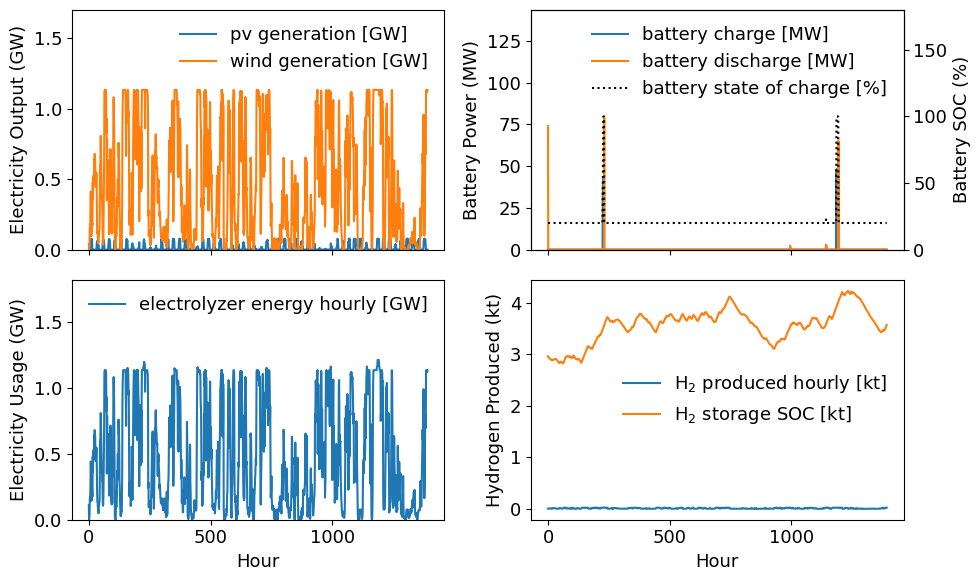

In [9]:
plot_energy_flows(start_date_time=dt.datetime(2013, 1, 1), end_date_time=dt.datetime(2013, 2, 28))

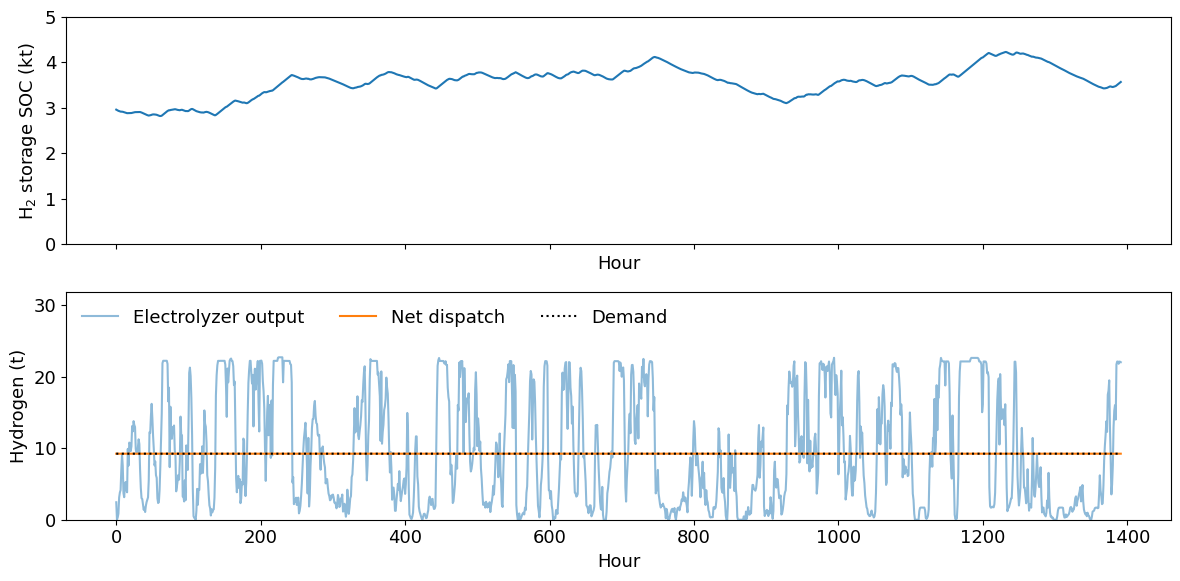

In [10]:
plot_hydrogen_flows(start_date_time=dt.datetime(2013, 1, 1), end_date_time=dt.datetime(2013, 2, 28))